In [2]:
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
%matplotlib inline

def strategy_3x_hedge(bull_symbol, bear_symbol, start_date, end_date, initial_investment, balance):
    # Download historical data
    bull_data = yf.download(bull_symbol, start=start_date, end=end_date)
    bear_data = yf.download(bear_symbol, start=start_date, end=end_date)

    # Calculate shares bought for TQQQ and SQQQ
    bull_shares = initial_investment / bull_data['Close'].iloc[0]
    bear_shares = initial_investment / bear_data['Close'].iloc[0]

    bull_value = bull_shares * bull_data['Close'].iloc[0]
    bear_value = bear_shares * bear_data['Close'].iloc[0]

    portfolio_value = bull_value + bear_value

    # Calculate portfolio value
    adjust_money = []
    portfolio_values = []
    portfolio_values.append(portfolio_value)

    # Adjust portfolio if 5% above previous value
    for i in range(1, len(bull_data)):
        if bull_data['Close'].iloc[i] * bull_shares + bear_data['Close'].iloc[i] * bear_shares > balance * portfolio_value:
            # Buy the lower part to equalize TQQQ and SQQQ values
            if bull_data['Close'].iloc[i] * bull_shares > bear_data['Close'].iloc[i] * bear_shares:
                gap = bull_data['Close'].iloc[i] * bull_shares - bear_data['Close'].iloc[i] * bear_shares
                bear_shares += gap / bear_data['Close'].iloc[i]
                adjust_money.append(gap)
            else:
                gap = bear_data['Close'].iloc[i] * bear_shares - bull_data['Close'].iloc[i] * bull_shares
                bull_shares += gap / bull_data['Close'].iloc[i]
                adjust_money.append(gap)
            portfolio_value = bull_shares * bull_data['Close'].iloc[i] + bear_shares * bear_data['Close'].iloc[i]
        portfolio_values.append(bull_shares * bull_data['Close'].iloc[i] + bear_shares * bear_data['Close'].iloc[i])

    cost = sum(adjust_money) + initial_investment * 2
    profit = (bull_shares * bull_data['Close'].iloc[i] + bear_shares * bear_data['Close'].iloc[i] - cost)/cost

    # Plot the portfolio value over time
    plt.figure(figsize=(10, 6))
    plt.plot(range(len(portfolio_values)), portfolio_values, label='Portfolio Value', color='b')
    plt.axhline(y=cost, color='r', linestyle='-')
    #plt.text(0, 0, f'profit: {profit * 100}:.2f%', fontsize=12, color='red')

    plt.xlabel('Date')
    plt.ylabel('Portfolio Value ($)')
    plt.title(f'{bull_symbol} and {bear_symbol} Portfolio Value, profit: {profit * 100:.2f}%')
    plt.grid(True)
    plt.legend()
    plt.show()


/var/folders/2b/2hbyhf556fx9n55ytm5d09kh0000gn/T/ipykernel_97813/2589042525.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


/Users/jianbfan/Desktop/study/.venv/lib/python3.11/site-packages/yfinance/utils.py:775: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
[*********************100%%**********************]  1 of 1 completed
/Users/jianbfan/Desktop/study/.venv/lib/python3.11/site-packages/yfinance/utils.py:775: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
[*********************100%%**********************]  1 of 1 completed


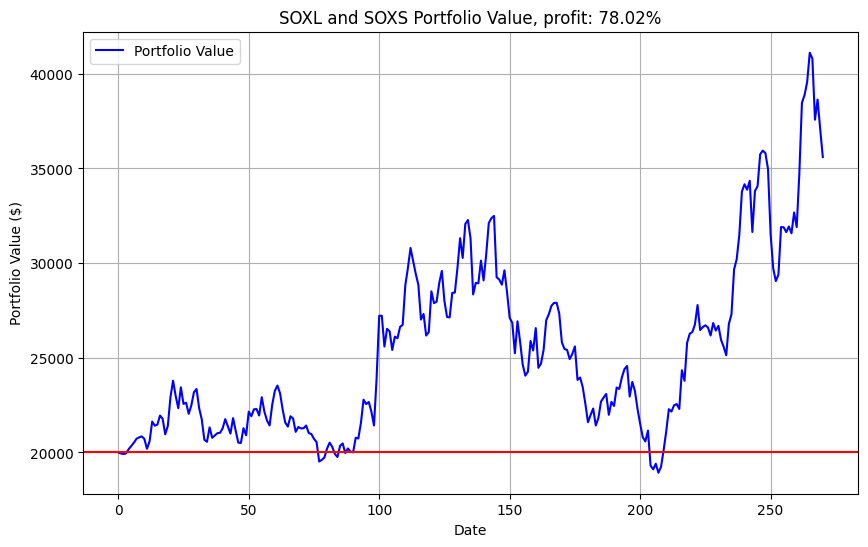

In [3]:
strategy_3x_hedge('SOXL', 'SOXS', '2023-1-2', '2024-02-01', 10000, 7)

In [ ]:
strategy_3x_hedge('SOXL', 'SOXS', '2023-2-2', '2024-02-01', 10000, 2)
strategy_3x_hedge('SOXL', 'SOXS', '2023-3-2', '2024-02-01', 10000, 2)
strategy_3x_hedge('SOXL', 'SOXS', '2023-4-2', '2024-02-01', 10000, 2)
strategy_3x_hedge('SOXL', 'SOXS', '2023-5-2', '2024-02-01', 10000, 2)
strategy_3x_hedge('SOXL', 'SOXS', '2023-6-2', '2024-02-01', 10000, 2)
strategy_3x_hedge('SOXL', 'SOXS', '2023-7-2', '2024-02-01', 10000, 2)
strategy_3x_hedge('SOXL', 'SOXS', '2023-8-2', '2024-02-01', 10000, 2)
strategy_3x_hedge('SOXL', 'SOXS', '2023-9-2', '2024-02-01', 10000, 2)
strategy_3x_hedge('SOXL', 'SOXS', '2023-10-2', '2024-02-01', 10000, 2)
strategy_3x_hedge('SOXL', 'SOXS', '2023-11-2', '2024-02-01', 10000, 2)
strategy_3x_hedge('SOXL', 'SOXS', '2023-12-2', '2024-02-01', 10000, 2)
strategy_3x_hedge('SOXL', 'SOXS', '2024-1-2', '2024-02-01', 10000, 2)
